In [54]:
import numpy as np
import matplotlib.pyplot as plt

### Read data from log files generated by ns-3

In [55]:
t_idx = 0
energy_idx = 1
pwr_idx = 2
temp_idx = 3
rel_idx = 4
def read_file(filename):
    trace = []
    pwr_all = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        prev_time, prev_energy = 0.0, 0.0
        for line in lines:
            data = line.strip().split(',')
            trace.append([float(d) for d in data])
            
            # calculate total power with wifi by differentiating energy
            cur_time = float(data[0])
            cur_energy = float(data[1])
            if cur_time - prev_time > 0:
                # print(cur_energy, cur_time)
                pwr_w_wifi = (cur_energy - prev_energy) / (cur_time - prev_time)
                pwr_all.append(pwr_w_wifi)
            prev_time = cur_time
            prev_energy = cur_energy
                
    trace = np.array(trace)
    pwr_all = np.array(pwr_all)
    print('Data from file', filename)
    print('power (W) avg. {} max. {} min. {}'.format(np.mean(trace[:, pwr_idx]), \
          np.max(trace[:, pwr_idx]), np.min(trace[:, pwr_idx])))
    print('temp (Celsius) avg. {} max. {} min. {}'.format(np.mean(trace[:, temp_idx]), \
          np.max(trace[:, temp_idx]), np.min(trace[:, temp_idx])))
    print('power w/ wifi (W) avg. {} max. {} min. {}'.format(np.mean(pwr_all), \
          np.max(pwr_all), np.min(pwr_all)))
    
    total_energy = trace[-1, energy_idx]
    total_time = trace[-1, t_idx]
    print('Total energy: {}, total time: {}, avg. power: {}\n'.format(total_energy, total_time, \
                                                                    total_energy/total_time))
    return trace

In [56]:
# read simulation data of scenario 1
folder = './s1-new/'
rpi01 = read_file(folder + 'rpi01.txt')
rpi02 = read_file(folder + 'rpi02.txt')
rpi03 = read_file(folder + 'rpi03.txt')
rpi04 = read_file(folder + 'rpi04.txt')
rpi31 = read_file(folder + 'rpi31.txt')
rpi32 = read_file(folder + 'rpi32.txt')
# reliability traces
rel_rpi01_s1 = rpi01[:, rel_idx]
rel_rpi0s_s1 = np.vstack((rpi02[:, rel_idx], rpi03[:, rel_idx], rpi04[:, rel_idx]))
rel_rpi0s_s1 = np.mean(rel_rpi0s_s1, axis=0)
# get mean values
pwr_mean_s1, temp_mean_s1 = [], []
for pi in [rpi01, rpi02, rpi03, rpi04, rpi31, rpi32]:
    pwr_mean_s1.append(np.mean(pi[:, pwr_idx]))
    temp_mean_s1.append(np.mean(pi[:, temp_idx]))

Data from file ./s1-new/rpi01.txt
power (W) avg. 1.0658360655737704 max. 1.304 min. 0.85
temp (Celsius) avg. 46.231042759562854 max. 47.3277 min. 35.0
power w/ wifi (W) avg. 0.8267414500683994 max. 3.2948 min. 0.0
Total energy: 302.174, total time: 365.5, avg. power: 0.8267414500683994

Data from file ./s1-new/rpi02.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 45.30159098360656 max. 45.3347 min. 35.0
power w/ wifi (W) avg. 0.7484295485636114 max. 3.38098 min. 0.0
Total energy: 273.551, total time: 365.5, avg. power: 0.7484295485636114

Data from file ./s1-new/rpi03.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 45.30159098360656 max. 45.3347 min. 35.0
power w/ wifi (W) avg. 0.7510095759233927 max. 3.35926 min. 0.0
Total energy: 274.494, total time: 365.5, avg. power: 0.7510095759233927

Data from file ./s1-new/rpi04.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 45.30159098360656 max. 45.3347

In [57]:
# read simulation data of scenario 2
folder = './s2-new/'
rpi01 = read_file(folder + 'rpi01.txt')
rpi02 = read_file(folder + 'rpi02.txt')
rpi03 = read_file(folder + 'rpi03.txt')
rpi04 = read_file(folder + 'rpi04.txt')
rpi31 = read_file(folder + 'rpi31.txt')
rpi32 = read_file(folder + 'rpi32.txt')
# reliability traces
rel_rpi01_s2 = rpi01[:, rel_idx]
rel_rpi0s_s2 = np.vstack((rpi02[:, rel_idx], rpi03[:, rel_idx], rpi04[:, rel_idx]))
rel_rpi0s_s2 = np.mean(rel_rpi0s_s2, axis=0)
# get mean values
pwr_mean_s2, temp_mean_s2 = [], []
for pi in [rpi01, rpi02, rpi03, rpi04, rpi31, rpi32]:
    pwr_mean_s2.append(np.mean(pi[:, pwr_idx]))
    temp_mean_s2.append(np.mean(pi[:, temp_idx]))

Data from file ./s2-new/rpi01.txt
power (W) avg. 1.0658360655737704 max. 1.304 min. 0.85
temp (Celsius) avg. 59.13650819672131 max. 60.273 min. 35.0
power w/ wifi (W) avg. 0.8702106703146375 max. 3.30056 min. 0.0
Total energy: 318.062, total time: 365.5, avg. power: 0.8702106703146375

Data from file ./s2-new/rpi02.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 45.30159098360656 max. 45.3347 min. 35.0
power w/ wifi (W) avg. 0.7853296853625171 max. 3.4159 min. 0.0
Total energy: 287.038, total time: 365.5, avg. power: 0.7853296853625171

Data from file ./s2-new/rpi03.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 45.30159098360656 max. 45.3347 min. 35.0
power w/ wifi (W) avg. 0.7894774281805745 max. 3.36536 min. 0.0
Total energy: 288.554, total time: 365.5, avg. power: 0.7894774281805745

Data from file ./s2-new/rpi04.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 45.30159098360656 max. 45.3347 m

In [58]:
# read simulation data of scenario 3
folder = './s3-new/'
rpi01 = read_file(folder + 'rpi01.txt')
rpi02 = read_file(folder + 'rpi02.txt')
rpi03 = read_file(folder + 'rpi03.txt')
rpi04 = read_file(folder + 'rpi04.txt')
rpi31 = read_file(folder + 'rpi31.txt')
rpi32 = read_file(folder + 'rpi32.txt')
# reliability traces
rel_rpi01_s3 = rpi01[:, rel_idx]
rel_rpi0s_s3 = np.vstack((rpi02[:, rel_idx], rpi03[:, rel_idx], rpi04[:, rel_idx]))
rel_rpi0s_s3 = np.mean(rel_rpi0s_s3, axis=0)
# get mean values
pwr_mean_s3, temp_mean_s3 = [], []
for pi in [rpi01, rpi02, rpi03, rpi04, rpi31, rpi32]:
    pwr_mean_s3.append(np.mean(pi[:, pwr_idx]))
    temp_mean_s3.append(np.mean(pi[:, temp_idx]))

Data from file ./s3-new/rpi01.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 58.205415710382496 max. 58.28 min. 35.0
power w/ wifi (W) avg. 0.7151737346101231 max. 3.31698 min. 0.0
Total energy: 261.396, total time: 365.5, avg. power: 0.7151737346101231

Data from file ./s3-new/rpi02.txt
power (W) avg. 1.0137413114754097 max. 1.30401 min. 0.85
temp (Celsius) avg. 45.91814207650273 max. 47.3278 min. 35.0
power w/ wifi (W) avg. 0.8044541723666211 max. 3.31794 min. 0.0
Total energy: 294.028, total time: 365.5, avg. power: 0.8044541723666211

Data from file ./s3-new/rpi03.txt
power (W) avg. 1.0373101366120216 max. 1.30401 min. 0.85
temp (Celsius) avg. 46.130812704918036 max. 47.3278 min. 35.0
power w/ wifi (W) avg. 0.8050533515731875 max. 3.29992 min. 0.0
Total energy: 294.247, total time: 365.5, avg. power: 0.8050533515731875

Data from file ./s3-new/rpi04.txt
power (W) avg. 1.0218043306010927 max. 1.30401 min. 0.85
temp (Celsius) avg. 46.01118551912568 max.

### Plot power and temperature error bar of RPi0s in each scenario 

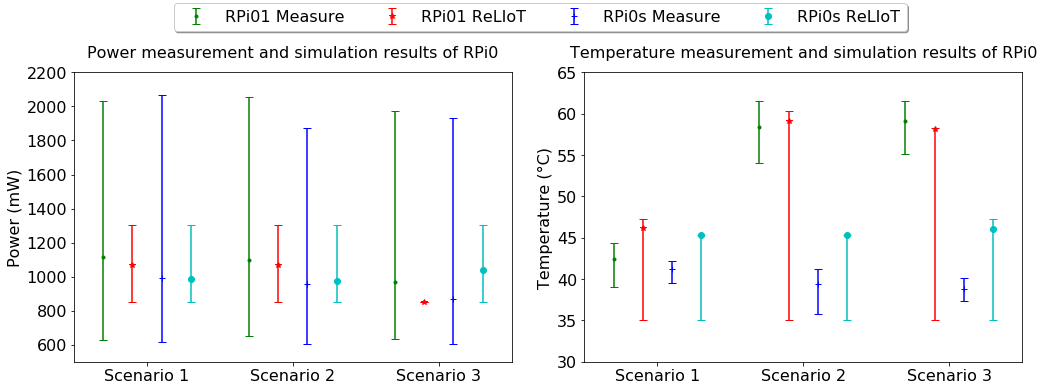

In [59]:
rpi01_m = []
rpi01_m.append([1115.45, 2034.75, 630.48]) # RPi01 scene 1 measure
rpi01_m.append([1100.06, 2053.04, 652.43]) # RPi01 scene 2 measure
rpi01_m.append([966.69, 1971.95, 632.31]) # RPi01 scene 3 measure

rpi01_s = []
rpi01_s.append([1065.8360655737704, 1304, 850.0]) # RPi01 scene 1 reliot
rpi01_s.append([1065.8360655737704, 1304, 850.0]) # RPi01 scene 2 reliot
rpi01_s.append([850.0, 850.0, 850.0]) # RPi01 scene 3 reliot ????????

# RPi0s data are copied from 172.27.0.3's data
rpi0s_m = []
rpi0s_m.append([994.10, 2065.24, 616.46]) # RPi0s scene 1 measure
rpi0s_m.append([959.72, 1876.21, 605.48]) # RPi0s scene 2 measure
rpi0s_m.append([869.42, 1929.87, 602.43]) # RPi0s scene 3 measure

rpi0s_s = []
rpi0s_s.append([983.6600478142076, 1304.01, 850.0]) # RPi0s scene 1 reliot
rpi0s_s.append([975.9071448087431, 1304.01, 850.0]) # RPi0s scene 2 reliot
rpi0s_s.append([1037.3101366120216, 1304.01, 850.0]) # RPi0s scene 3 reliot ????????

def formalize(data):
    '''
    generate mean, high/low error from [mean, max, min] statistics
    '''
    data = np.array(data)
    mean = data[:, 0]
    higherr = data[:, 1] - data[:, 0]
    lowerr = data[:, 0] - data[:, 2]
    return mean, higherr, lowerr

rpi01_m_mean, rpi01_m_higherr, rpi01_m_lowerr = formalize(rpi01_m)
rpi01_s_mean, rpi01_s_higherr, rpi01_s_lowerr = formalize(rpi01_s)
rpi0s_m_mean, rpi0s_m_higherr, rpi0s_m_lowerr = formalize(rpi0s_m)
rpi0s_s_mean, rpi0s_s_higherr, rpi0s_s_lowerr = formalize(rpi0s_s)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,5))
#ax = plt.gca()
x_pos = range(3)
x_rpi01_m = [x-0.3 for x in x_pos]
x_rpi01_s = [x-0.1 for x in x_pos]
x_rpi0s_m = [x+0.1 for x in x_pos]
x_rpi0s_s = [x+0.3 for x in x_pos]
ax1.errorbar(x_rpi01_m, rpi01_m_mean, yerr=[rpi01_m_lowerr, rpi01_m_higherr], \
            fmt='g.', ecolor='g', elinewidth=1.5, capsize=4, label='RPi01 Measure')
ax1.errorbar(x_rpi01_s, rpi01_s_mean, yerr=[rpi01_s_lowerr, rpi01_s_higherr], \
            fmt='r*', ecolor='r', elinewidth=1.5, capsize=4, label='RPi01 ReLIoT')
ax1.errorbar(x_rpi0s_m, rpi0s_m_mean, yerr=[rpi0s_m_lowerr, rpi0s_m_higherr], \
            fmt='b+', ecolor='b', elinewidth=1.5, capsize=4, label='RPi0s Measure')
ax1.errorbar(x_rpi0s_s, rpi0s_s_mean, yerr=[rpi0s_s_lowerr, rpi0s_s_higherr], \
            fmt='co', ecolor='c', elinewidth=1.5, capsize=4, label='RPi0s ReLIoT')

plt.xticks(np.arange(3), ['Scenario 1', 'Scenario 2', 'Scenario 3'])
ax1.set_xlim(left=-0.5, right=2.5)
ax1.set_ylim(bottom=500, top=2200)
ax1.set_ylabel("Power (mW)", fontsize=16)
ax1.tick_params(labelsize=16)
ax1.set_title("Power measurement and simulation results of RPi0", fontsize=16, pad=15)

rpi01_m = []
rpi01_m.append([42.46, 44.4, 39.0]) # RPi01 scene 1 measure
rpi01_m.append([58.39, 61.6, 54.1]) # RPi01 scene 2 measure
rpi01_m.append([59.12, 61.6, 55.1]) # RPi01 scene 3 measure

rpi01_s = []
rpi01_s.append([46.231042759562854, 47.3277, 35.0]) # RPi01 scene 1 reliot
rpi01_s.append([59.13650819672131, 60.273, 35.0]) # RPi01 scene 2 reliot
rpi01_s.append([58.205415710382496, 58.28, 35.0]) # RPi01 scene 3 reliot

# RPi0s data are copied from 172.27.0.3's data
rpi0s_m = []
rpi0s_m.append([41.26, 42.2, 39.5]) # RPi0s scene 1 measure
rpi0s_m.append([39.42, 41.2, 35.8]) # RPi0s scene 2 measure
rpi0s_m.append([38.79, 40.1, 37.4]) # RPi0s scene 3 measure

rpi0s_s = []
rpi0s_s.append([45.30159098360656, 45.3347, 35.0]) # RPi0s scene 1 reliot
rpi0s_s.append([45.30159098360656, 45.3347, 35.0]) # RPi0s scene 2 reliot
rpi0s_s.append([46.01118551912568, 47.3278, 35.0]) # RPi0s scene 3 reliot


rpi01_m_mean, rpi01_m_higherr, rpi01_m_lowerr = formalize(rpi01_m)
rpi01_s_mean, rpi01_s_higherr, rpi01_s_lowerr = formalize(rpi01_s)
rpi0s_m_mean, rpi0s_m_higherr, rpi0s_m_lowerr = formalize(rpi0s_m)
rpi0s_s_mean, rpi0s_s_higherr, rpi0s_s_lowerr = formalize(rpi0s_s)


x_pos = range(3)
x_rpi01_m = [x-0.3 for x in x_pos]
x_rpi01_s = [x-0.1 for x in x_pos]
x_rpi0s_m = [x+0.1 for x in x_pos]
x_rpi0s_s = [x+0.3 for x in x_pos]
ax2.errorbar(x_rpi01_m, rpi01_m_mean, yerr=[rpi01_m_lowerr, rpi01_m_higherr], \
            fmt='g.', ecolor='g', elinewidth=1.5, capsize=4)
ax2.errorbar(x_rpi01_s, rpi01_s_mean, yerr=[rpi01_s_lowerr, rpi01_s_higherr], \
            fmt='r*', ecolor='r', elinewidth=1.5, capsize=4)
ax2.errorbar(x_rpi0s_m, rpi0s_m_mean, yerr=[rpi0s_m_lowerr, rpi0s_m_higherr], \
            fmt='b+', ecolor='b', elinewidth=1.5, capsize=4)
ax2.errorbar(x_rpi0s_s, rpi0s_s_mean, yerr=[rpi0s_s_lowerr, rpi0s_s_higherr], \
            fmt='co', ecolor='c', elinewidth=1.5, capsize=4)

plt.xticks(np.arange(3), ['Scenario 1', 'Scenario 2', 'Scenario 3'])
ax2.set_xlim(left=-0.5, right=2.5)
ax2.set_ylim(bottom=30, top=65)
ax2.set_ylabel("Temperature (°C)", fontsize=16)
ax2.tick_params(labelsize=16)
ax2.set_title("Temperature measurement and simulation results of RPi0", fontsize=16, pad=15)
lgd = fig.legend(loc='upper center', fontsize=16, facecolor='white', \
        shadow=True, fancybox=True, ncol=4, bbox_to_anchor=(0.5, 1.1))

plt.tight_layout()
plt.savefig('./powertemp.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

#plt.show()

### Plot reliability curve

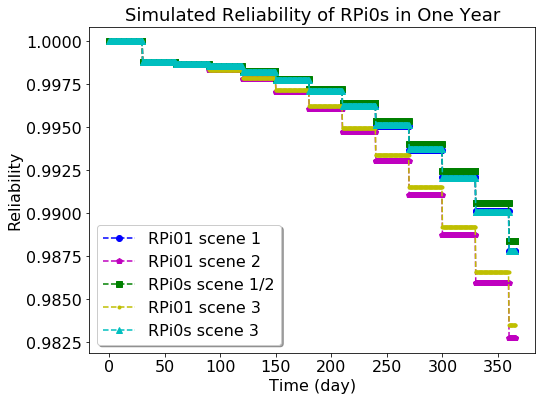

In [60]:
fig = plt.figure(figsize=(8,6))
t = rpi01[:, t_idx]
plt.plot(t, rel_rpi01_s1, 'b--o', label='RPi01 scene 1') # b--o
plt.plot(t, rel_rpi01_s2, 'm--p', label='RPi01 scene 2') # m--p
plt.plot(t, rel_rpi0s_s1, 'g--s', label='RPi0s scene 1/2') # r--s
#plt.plot(t, rel_rpi0s_s2, 'r--*', label='RPi0s scene 2') # c--*
plt.plot(t, rel_rpi01_s3, 'y--.', label='RPi01 scene 3') # y--v
plt.plot(t, rel_rpi0s_s3, 'c--^', label='RPi0s scene 3') # g--^

plt.legend(fontsize=16, shadow=True, fancybox=True)
plt.xlabel("Time (day)", fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel("Reliability", fontsize=16)
plt.yticks(fontsize=16)
plt.title("Simulated Reliability of RPi0s in One Year", fontsize=18)

plt.savefig('./rel.png', dpi=300)

## Mean Absolute Error

In [61]:
def MAE(a, b):
    '''
    a, b are np arrays. a is the true value.
    '''
    err = np.absolute(a-b)
    err_pro = np.divide(np.absolute(a - b), a)
    return np.mean(err), np.mean(err_pro)

# exp. mean power
# rpi01, rpi02, rpi03, rpi04, rpi31, rpi32
# s1 || s2 || s3
exp_mean_power = [1.1154588118499123, 1.1062641521640676, 0.9040385295157304,
                  0.863096333793527, 5.440087686380269, 1.6912609193106084*4,
                  1.1000626422381076, 0.9597277874564451, 0.9066074739694767,
                  0.9588411914449198, 5.3845964807422435, 1.7001204121172602*4, 
                  0.966692772432308, 0.8701648163230304, 0.8574925117672207,
                  0.8250980539242995, 5.39740976472228, 1.7019714089123063*4] 
pwr_mean_s2.extend(pwr_mean_s3)
pwr_mean_s1.extend(pwr_mean_s2)
print('Measure:', exp_mean_power)
print('RelIoT:', pwr_mean_s1)
exp_mean_power = np.array(exp_mean_power)
sim_mean_power = np.array(pwr_mean_s1)
err, err_pro = MAE(exp_mean_power, sim_mean_power)
print('Mean Absolute Error of Power is {}% with absolute difference of {}W'.format( \
    err_pro*100, err))

# exp. mean temperature
# s1 || s2 | s3
exp_mean_temp = [42.46521739130496, 41.04960212201557, 40.212318840579755,
                  40.04779874213844, 61.90447427293057, 51.744229337304304,
                  58.3988689915174, 39.42374999999932, 40.46783625731,
                  40.63006244424548, 59.23904263275852, 51.842687453600156, 
                  59.12651376146826, 39.92355008787277, 40.71491228070092,
                  41.390421792618085, 61.18152011922583, 51.77186340014824] 
temp_mean_s2.extend(temp_mean_s3)
temp_mean_s1.extend(temp_mean_s2)
print('Measure:', exp_mean_temp)
print('RelIoT:', temp_mean_s1)
exp_mean_temp = np.array(exp_mean_temp)
sim_mean_temp = np.array(temp_mean_s1)
err, err_pro = MAE(exp_mean_temp, sim_mean_temp)
print('Mean Absolute Error of Temperature is {}% with absolute difference of {} Celsius'.format( \
    err_pro*100, err))

Measure: [1.1154588118499122, 1.1062641521640677, 0.9040385295157304, 0.863096333793527, 5.440087686380269, 6.765043677242433, 1.1000626422381077, 0.959727787456445, 0.9066074739694767, 0.9588411914449197, 5.3845964807422435, 6.800481648469041, 0.966692772432308, 0.8701648163230304, 0.8574925117672207, 0.8250980539242995, 5.39740976472228, 6.807885635649225]
RelIoT: [1.0658360655737704, 0.8499999999999998, 0.8499999999999998, 0.8499999999999998, 2.0, 2.0, 1.0658360655737704, 0.8499999999999998, 0.8499999999999998, 0.8499999999999998, 2.0, 2.0, 0.8499999999999998, 1.0137413114754097, 1.0373101366120216, 1.0218043306010927, 2.0, 2.0]
Mean Absolute Error of Power is 30.07315515680548% with absolute difference of 1.439706825199801W
Measure: [42.46521739130496, 41.04960212201557, 40.212318840579755, 40.04779874213844, 61.90447427293057, 51.744229337304304, 58.3988689915174, 39.42374999999932, 40.46783625731, 40.63006244424548, 59.23904263275852, 51.842687453600156, 59.12651376146826, 39.923